<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




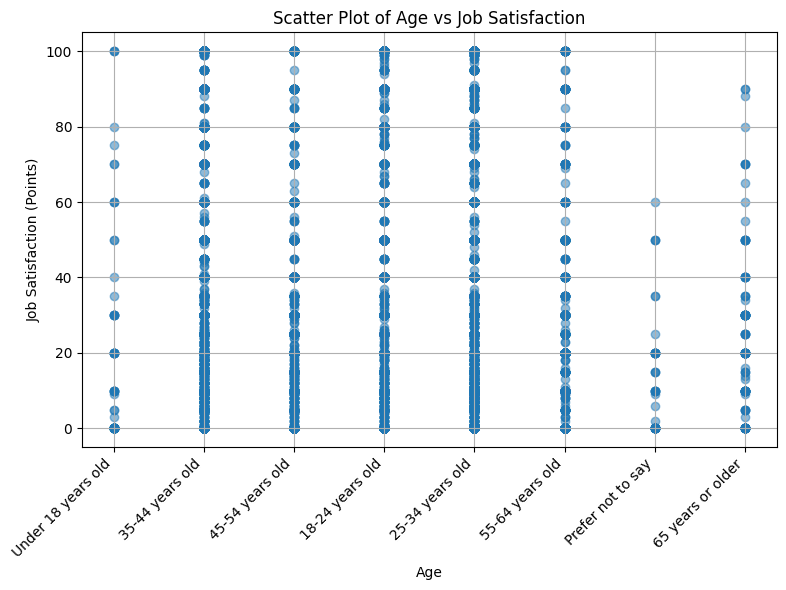

In [3]:
## Write your code here
# Create the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


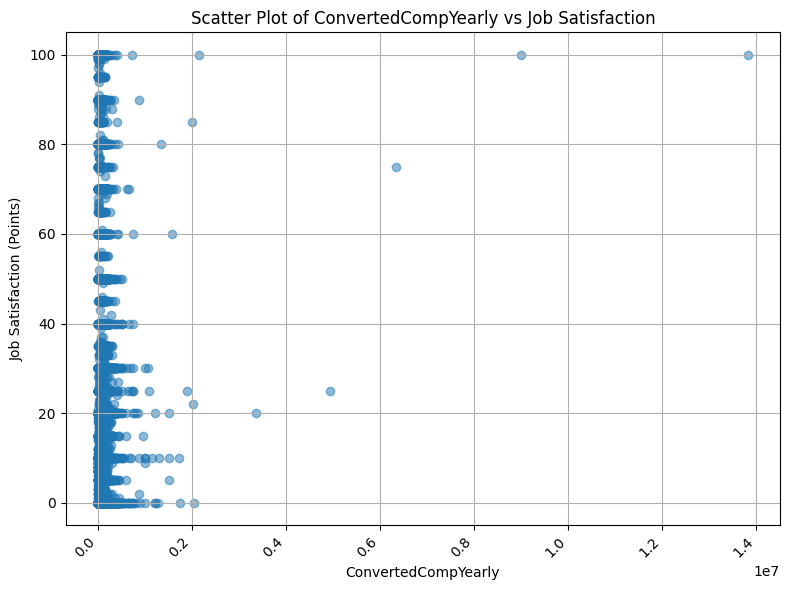

In [4]:
## Write your code here
plt.figure(figsize=(8, 6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], alpha=0.5)
plt.title('Scatter Plot of ConvertedCompYearly vs Job Satisfaction')
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


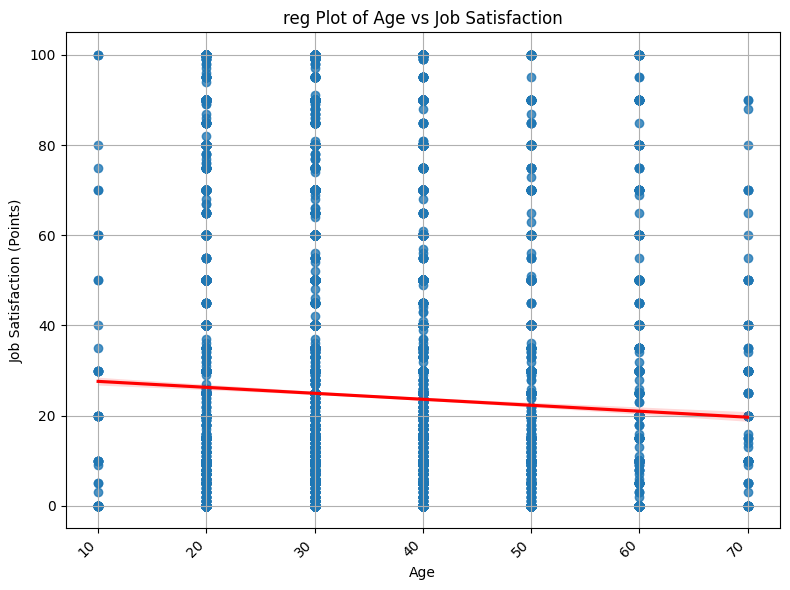

In [5]:
## Write your code here
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}

df['AgeNumeric'] = df['Age'].map(age_mapping)
plt.figure(figsize=(8, 6))
sns.regplot(data=df, x='AgeNumeric', y='JobSatPoints_6',line_kws={'color': 'red'})
plt.title('reg Plot of Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


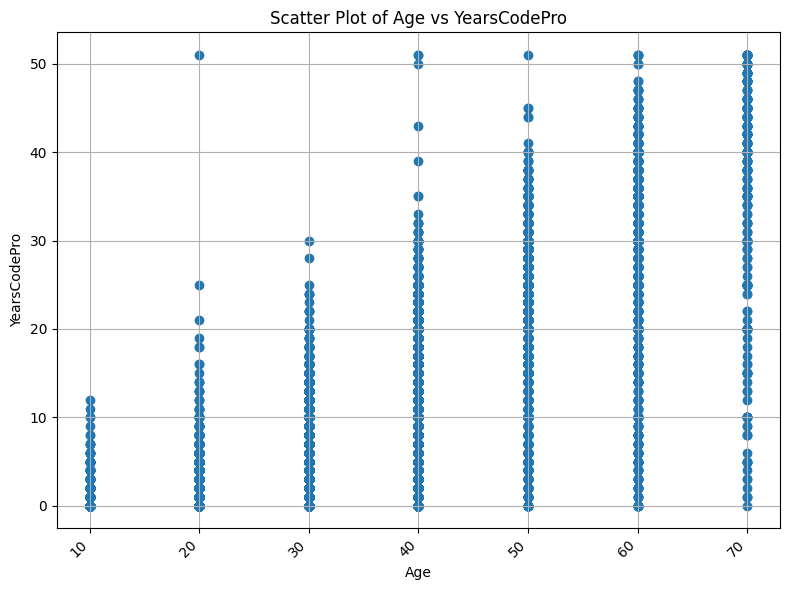

In [6]:
## Write your code here
def convert_yearscode(year_str):
    if year_str == 'More than 50 years':
        return 51 # Represent as a value slightly above 50
    elif year_str == 'Less than 1 year':
        return 0 # Represent as 0 or 0.5
    else:
        return pd.to_numeric(year_str, errors='coerce')


df['YearsCodePro_numeric'] = df['YearsCodePro'].apply(convert_yearscode)
plt.figure(figsize=(8, 6))
plt.scatter(df['AgeNumeric'], df['YearsCodePro_numeric'])
plt.title('Scatter Plot of Age vs YearsCodePro')
plt.xlabel('Age')
plt.ylabel('YearsCodePro')
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


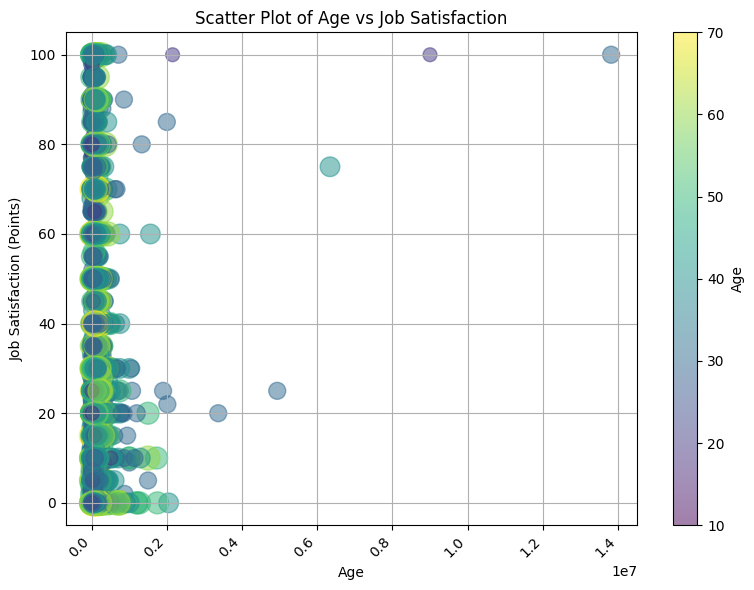

In [ ]:
## Write your code here
plt.figure(figsize=(8, 6))
scatter=plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'],
            s=df['AgeNumeric']*5,
            c=df['AgeNumeric'],
            cmap='viridis',
            alpha=0.5)
cbar = plt.colorbar(scatter)
cbar.set_label('Age')
plt.title('Scatter Plot of Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.xticks(rotation=45,ha="right")
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


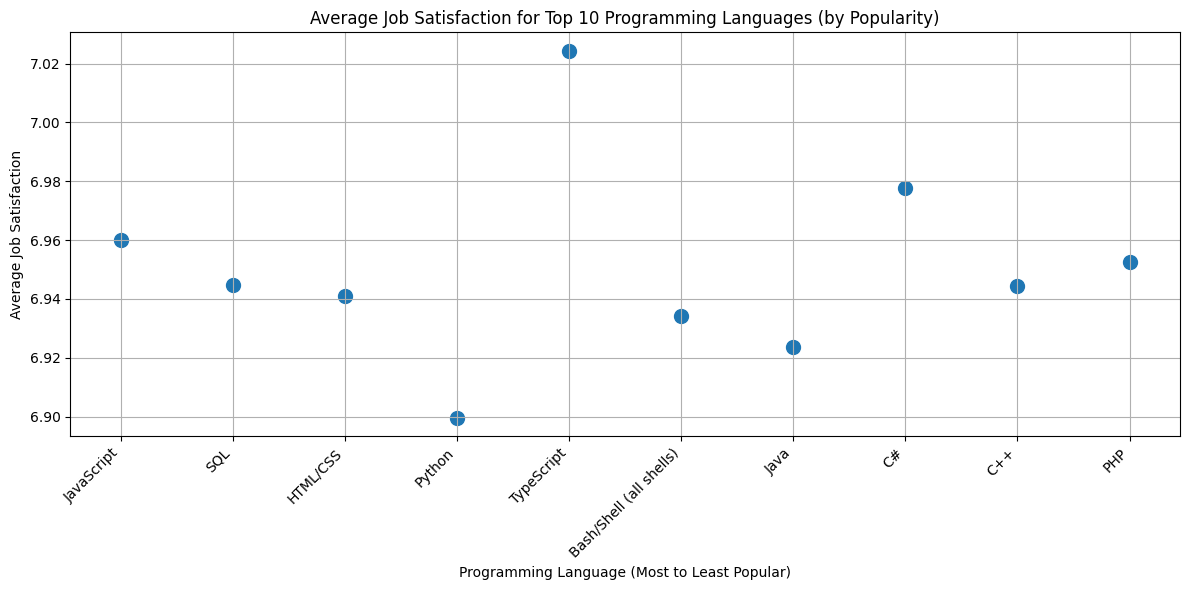

In [8]:
## Write your code here
df_lang_sat = df[['LanguageHaveWorkedWith', 'JobSat']].dropna()
df_lang_sat['LanguageList'] = df_lang_sat['LanguageHaveWorkedWith'].str.split(';')
df_exploded = df_lang_sat.explode('LanguageList')
df_exploded.dropna(subset=['JobSat', 'LanguageList'], inplace=True)

# Get top 10 most popular languages (by respondent count)
top_10_languages = df_exploded['LanguageList'].value_counts().nlargest(10)
language_order = top_10_languages.index.tolist()

# Filter to only those languages
df_top_langs = df_exploded[df_exploded['LanguageList'].isin(language_order)]

# Calculate average JobSat for each language (without sorting by value)
avg_jobsat_per_lang = df_top_langs.groupby('LanguageList')['JobSat'].mean()

# Reorder average values according to popularity order
avg_jobsat_per_lang = avg_jobsat_per_lang.reindex(language_order)

# Assign numeric positions for x-axis based on popularity
lang_positions = list(range(len(language_order)))

# Scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(lang_positions, avg_jobsat_per_lang.values, 
            s=100)

# Set custom x-ticks
plt.xticks(ticks=lang_positions, labels=language_order, rotation=45, ha='right')

plt.title('Average Job Satisfaction for Top 10 Programming Languages (by Popularity)')
plt.xlabel('Programming Language (Most to Least Popular)')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.tight_layout()
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


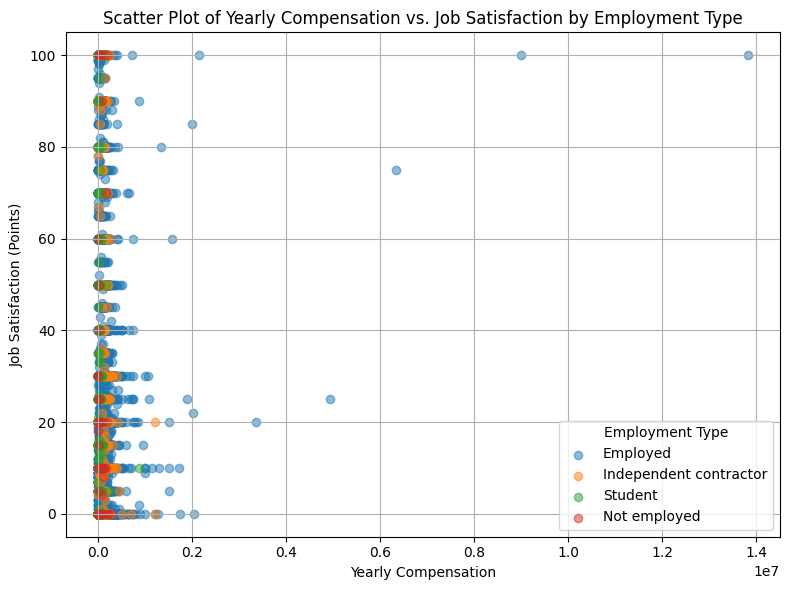

In [9]:
## Write your code here
df_comp_sat = df[['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']].dropna()

# # Scatter plot using seaborn with hue for Employment type
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=df_comp_sat, 
#                 x='ConvertedCompYearly', 
#                 y='JobSatPoints_6', 
#                 hue='Employment', 
#                 palette='Set2',
#                 alpha=0.7)

# plt.title('Compensation vs. Job Satisfaction by Employment Type')
# plt.xlabel('Yearly Compensation')
# plt.ylabel('Job Satisfaction (Points)')
# plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.grid(True)
# plt.tight_layout()
# plt.show()

df_comp_sat['Employment_Group'] = df_comp_sat['Employment'].str.split(',').str[0]

# Get unique employment types for coloring/markers
employment_types = df_comp_sat['Employment_Group'].unique()

plt.figure(figsize=(8, 6))

# Plot scatter for each employment type
for employment_type in employment_types:
    df_subset = df_comp_sat[df_comp_sat['Employment_Group'] == employment_type]
    plt.scatter(
        df_subset['ConvertedCompYearly'],
        df_subset['JobSatPoints_6'],
        alpha=0.5,
        label=employment_type # Use employment type for the legend
    )

plt.title('Scatter Plot of Yearly Compensation vs. Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction (Points)')
plt.grid(True)
plt.legend(title='Employment Type') # Add a legend to identify colors/markers
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


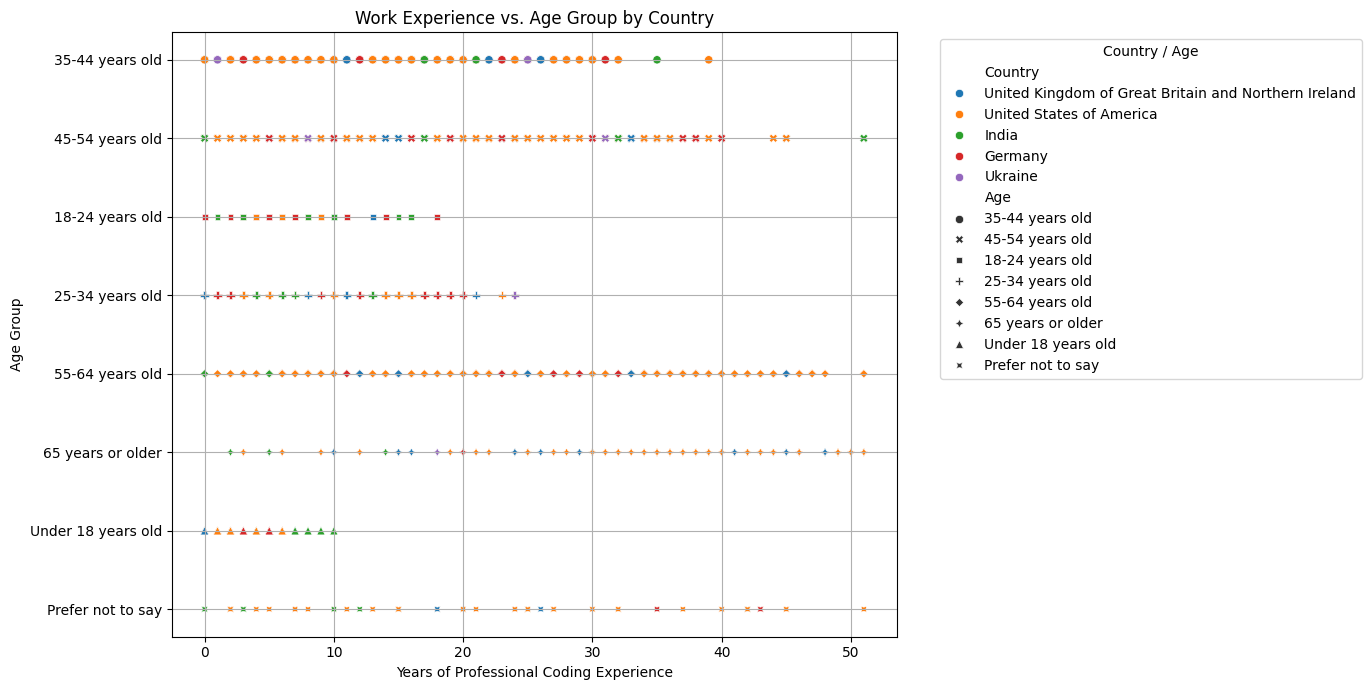

In [10]:
## Write your code here
df_exp_age_country = df[['YearsCodePro', 'Age', 'Country']].dropna()

# Convert 'YearsCodePro' to numeric, coercing text values
df_exp_age_country['YearsCodePro'] = pd.to_numeric(df_exp_age_country['YearsCodePro'].replace({'Less than 1 year': 0, 'More than 50 years': 51}), errors='coerce')

# Drop any remaining NaNs after conversion
df_exp_age_country.dropna(subset=['YearsCodePro', 'Age', 'Country'], inplace=True)

# Optional: Limit to top 5 or 10 countries by respondent count for clarity
top_countries = df_exp_age_country['Country'].value_counts().nlargest(5).index
df_filtered = df_exp_age_country[df_exp_age_country['Country'].isin(top_countries)]

# Scatter plot using seaborn
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df_filtered,
                x='YearsCodePro', 
                y='Age',
                hue='Country',
                style='Age',
                )

plt.title('Work Experience vs. Age Group by Country')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country / Age')
plt.grid(True)
plt.tight_layout()
plt.show()

### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
